In [1]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [2]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [3]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [4]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [5]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [6]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [7]:
response=requests.get(spacex_url)

In [8]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [9]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [10]:
response.status_code

200

In [11]:
data_json=response.json()

In [12]:
data=pd.json_normalize(data_json)

In [30]:
data

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04
...,...,...,...,...,...,...,...
101,5e9d0d95eda69973a809d1ec,5ef6a4600059c33cee4a829e,5e9e4502f509094188566f88,"{'core': '5ef670f10059c33cee4a826c', 'flight': 2, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3032383ecb6bb234e7ca'}",102,2020-09-03T12:46:00.000Z,2020-09-03
102,5e9d0d95eda69973a809d1ec,5ef6a48e0059c33cee4a829f,5e9e4502f509094188566f88,"{'core': '5e9e28a7f3591817f23b2663', 'flight': 3, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3032383ecb6bb234e7ca'}",103,2020-10-06T11:29:00.000Z,2020-10-06
103,5e9d0d95eda69973a809d1ec,5ef6a4d50059c33cee4a82a1,5e9e4502f509094188566f88,"{'core': '5e9e28a6f35918c0803b265c', 'flight': 6, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3032383ecb6bb234e7ca'}",104,2020-10-18T12:25:00.000Z,2020-10-18
104,5e9d0d95eda69973a809d1ec,5ef6a4ea0059c33cee4a82a2,5e9e4501f509094ba4566f84,"{'core': '5ef670f10059c33cee4a826c', 'flight': 3, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3033383ecbb9e534e7cc'}",105,2020-10-24T15:31:00.000Z,2020-10-24


In [13]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [14]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [15]:
getBoosterVersion(data)

In [16]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [17]:
# Call getLaunchSite
getLaunchSite(data)

In [18]:
# Call getPayloadData
getPayloadData(data)

In [19]:
# Call getCoreData
getCoreData(data)

In [20]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [38]:
launch_df = pd.DataFrame(launch_dict)

In [39]:
launch_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    94 non-null     int64  
 1   Date            94 non-null     object 
 2   BoosterVersion  94 non-null     object 
 3   PayloadMass     88 non-null     float64
 4   Orbit           94 non-null     object 
 5   LaunchSite      94 non-null     object 
 6   Outcome         94 non-null     object 
 7   Flights         94 non-null     int64  
 8   GridFins        94 non-null     bool   
 9   Reused          94 non-null     bool   
 10  Legs            94 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     94 non-null     int64  
 14  Serial          94 non-null     object 
 15  Longitude       94 non-null     float64
 16  Latitude        94 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [40]:
launch_df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721


In [41]:
data_falcon9 = launch_df[launch_df['BoosterVersion'] != 'Falcon 1']


In [42]:
data_falcon9.isna().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [46]:
mean_payload=data_falcon9["PayloadMass"].mean()
data_falcon9["PayloadMass"].fillna(mean_payload,inplace=True)


C:\Users\kadir\AppData\Local\Temp\ipykernel_4184\2881357083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9["PayloadMass"].fillna(mean_payload,inplace=True)


In [48]:
data_falcon9["LandingPad"].value_counts()


LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64

In [49]:
data_falcon9["LandingPad"].fillna("5e9e3032383ecb6bb234e7ca",inplace=True)

C:\Users\kadir\AppData\Local\Temp\ipykernel_4184\4206774855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9["LandingPad"].fillna("5e9e3032383ecb6bb234e7ca",inplace=True)


In [50]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)


In [51]:
df=pd.read_csv("dataset_part_1.csv")

In [52]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B0007,-80.577366,28.561857
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B1003,-120.610829,34.632093
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,102,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
86,103,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
87,104,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
88,105,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [54]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [55]:
df["LaunchSite"].value_counts()

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [60]:
landing_outcomes=df["Outcome"].value_counts()

In [61]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [62]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [63]:
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

In [65]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [66]:
df["Class"].mean()

0.6666666666666666

In [67]:
df.to_csv("dataset_part_2.csv", index=False)

In [71]:
df["Orbit"].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [4]:
import requests
import pandas as pd
from io import BytesIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL)
dataset_part_2_csv = BytesIO(response.content)

df2 = pd.read_csv(dataset_part_2_csv)
df2.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


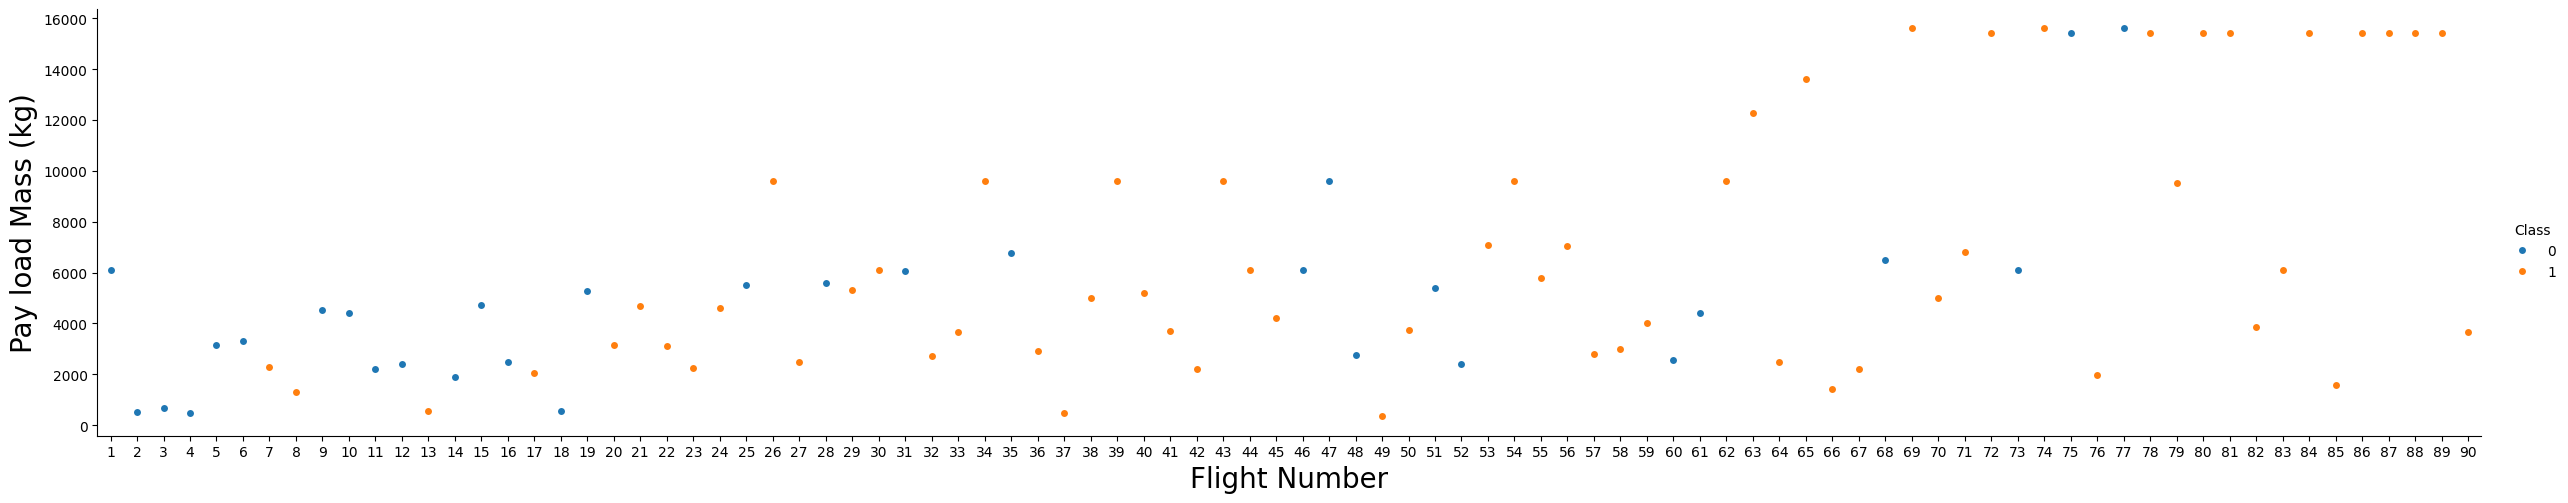

In [7]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df2, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

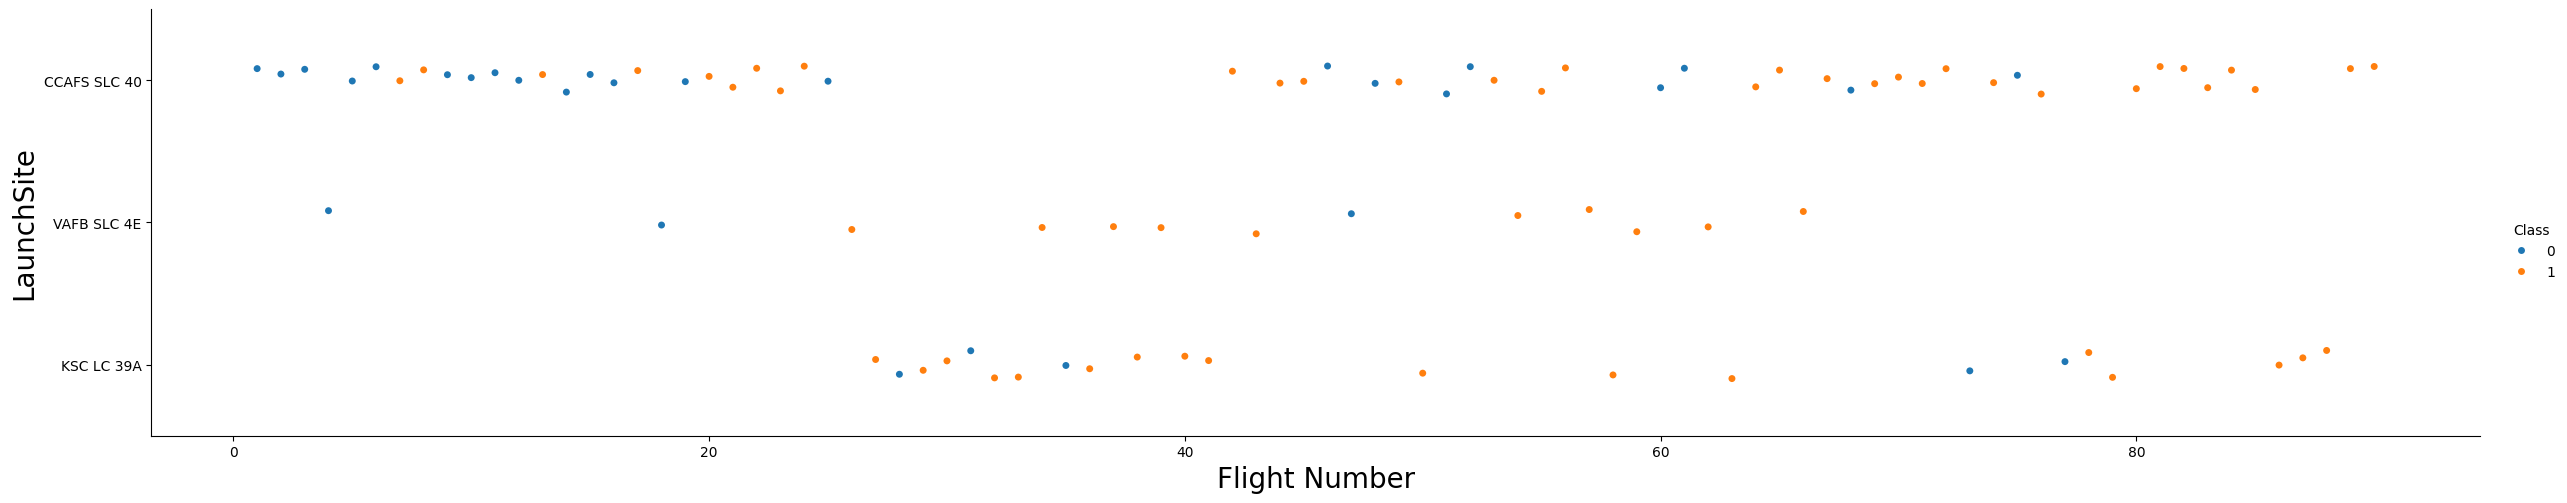

In [8]:
sns.catplot(x="FlightNumber", y="LaunchSite",hue="Class",data=df2,aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

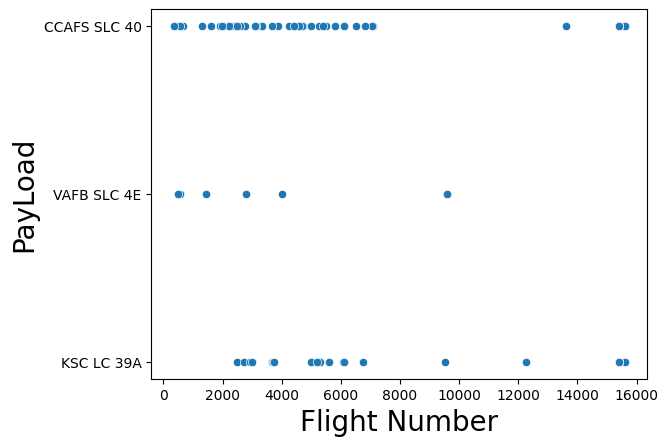

In [14]:
sns.scatterplot(x="PayloadMass",y="LaunchSite",data=df2);
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("PayLoad",fontsize=20)
plt.show()

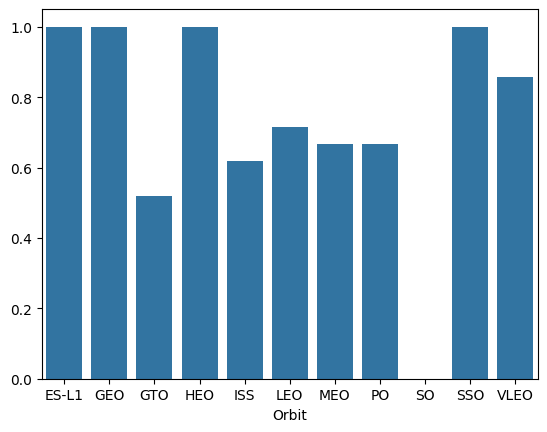

In [17]:
success_rate_by_orbit = df2.groupby('Orbit')['Class'].mean()
sns.barplot(x=success_rate_by_orbit.index,y=success_rate_by_orbit.values)
plt.show()


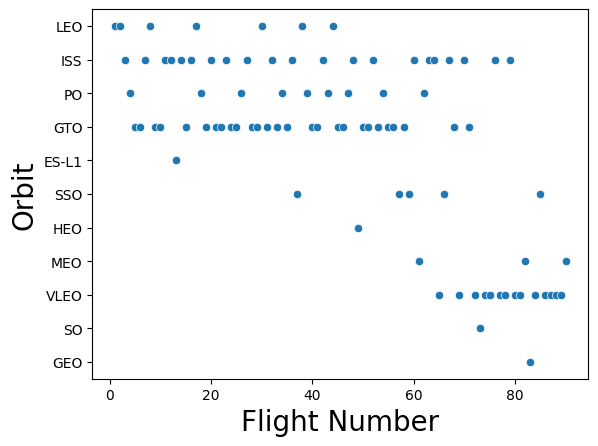

In [18]:
sns.scatterplot(x="FlightNumber",y="Orbit",data=df2);
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [32]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [48]:

df_encoded=pd.get_dummies(features,columns=["Orbit","LaunchSite","Serial","LandingPad","GridFins","Reused","Legs"])

In [49]:
df_encoded

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_0.0,Orbit_1.0,LaunchSite_0.0,LaunchSite_1.0,Serial_0.0,Serial_1.0,LandingPad_0.0,LandingPad_1.0,GridFins_0.0,GridFins_1.0,Reused_0.0,Reused_1.0,Legs_0.0,Legs_1.0
0,1,6104.959412,1,1.0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1
1,2,525.000000,1,1.0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
2,3,677.000000,1,1.0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
3,4,500.000000,1,1.0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,5,3170.000000,1,1.0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,5.0,2,0,1,0,1,0,1,0,1,1,0,1,0,1,0
86,87,15400.000000,3,5.0,2,0,1,0,1,0,1,0,1,1,0,1,0,1,0
87,88,15400.000000,6,5.0,5,0,1,0,1,0,1,0,1,1,0,1,0,1,0
88,89,15400.000000,3,5.0,2,0,1,1,0,0,1,0,1,1,0,1,0,1,0


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [51]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [54]:
y=df2["Class"].to_numpy()

In [59]:
transform = preprocessing.StandardScaler()

scaled_x=transform.fit_transform(features)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_x, y, test_size=0.25, random_state=42)


In [62]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [64]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)


In [65]:
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [66]:
print("Best Parameters: ", logreg_cv.best_params_)
print("Best Accuracy: ", logreg_cv.best_score_)

Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy:  0.8119047619047619


In [67]:
# Use the best parameters obtained from GridSearchCV
best_params = logreg_cv.best_params_

# Create a new logistic regression model with the best parameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])

# Fit the model to the training data
best_logreg.fit(X_train, Y_train)

# Calculate accuracy on the test data
accuracy = best_logreg.score(X_test, Y_test)

print("Accuracy on Test Data: {:.2f}%".format(accuracy * 100))


Accuracy on Test Data: 91.30%


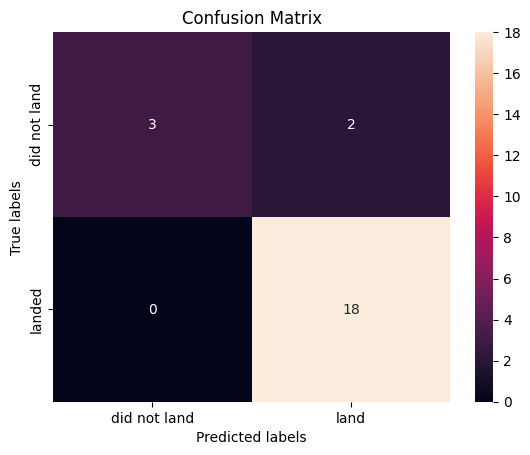

In [68]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [69]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create a Support Vector Machine object
svm = SVC()

# Define the hyperparameter grid
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Create a GridSearchCV object with SVM and cross-validation of 10 folds
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the data to find the best parameters
svm_cv.fit(X_train, Y_train)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", svm_cv.best_params_)
print("Best Accuracy: ", svm_cv.best_score_)


Best Parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
Best Accuracy:  0.8952380952380953


In [71]:
# Use the best parameters obtained from GridSearchCV
best_params_svm = svm_cv.best_params_

# Create a new SVM model with the best parameters
best_svm = SVC(C=best_params_svm['C'], kernel=best_params_svm['kernel'], gamma=best_params_svm['gamma'])

# Fit the model to the training data
best_svm.fit(X_train, Y_train)

# Calculate accuracy on the test data
accuracy_svm = best_svm.score(X_test, Y_test)

print("Accuracy on Test Data: {:.2f}%".format(accuracy_svm * 100))


Accuracy on Test Data: 91.30%


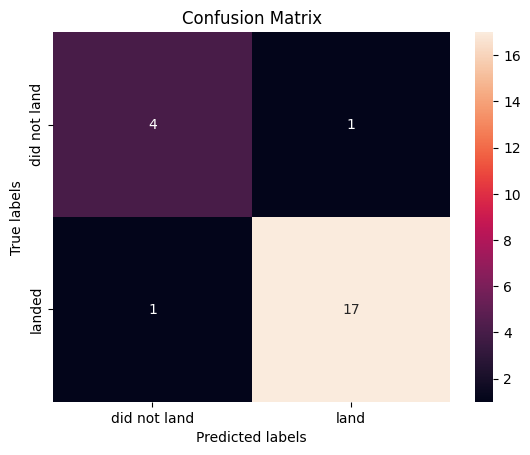

In [72]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [73]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [74]:
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the data to find the best parameters
tree_cv.fit(X_train, Y_train)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", tree_cv.best_params_)
print("Best Accuracy: ", tree_cv.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Accuracy:  0.8976190476190476


c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.

In [76]:
best_tree_classifier = DecisionTreeClassifier(**tree_cv.best_params_)

# Fit the model to the training data
best_tree_classifier.fit(X_train, Y_train)

# Calculate accuracy on the test data
accuracy_tree = best_tree_classifier.score(X_test, Y_test)

print("Accuracy on Test Data: {:.2f}%".format(accuracy_tree * 100))

Accuracy on Test Data: 78.26%


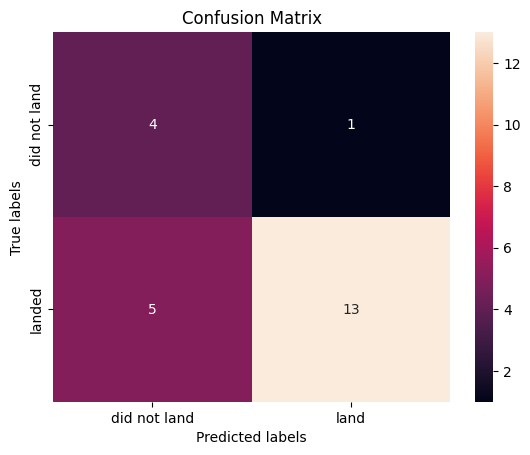

In [77]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [78]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [79]:

# Create a GridSearchCV object with k-Nearest Neighbors and cross-validation of 10 folds
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to the data to find the best parameters
knn_cv.fit(X_train, Y_train)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", knn_cv.best_params_)
print("Best Accuracy: ", knn_cv.best_score_)

c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kadir\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Best Accuracy:  0.8547619047619047


In [80]:
best_knn_classifier = KNeighborsClassifier(**knn_cv.best_params_)

# Fit the model to the training data
best_knn_classifier.fit(X_train, Y_train)

# Calculate accuracy on the test data
accuracy_knn = best_knn_classifier.score(X_test, Y_test)

print("Accuracy on Test Data: {:.2f}%".format(accuracy_knn * 100))

Accuracy on Test Data: 91.30%


Best Model Performance Of Falcon9 Classification is Logistic , Svm , Knn these Methods' Accuracy is 91.30 . 